In [1]:
import cv2, numpy as np
import matplotlib.pylab as plt
%matplotlib inline

def imshow(tit, image) :
    plt.title(tit)
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image,cmap="gray")
        plt.show()

## Threshold

* _, binary = cv2.threshold(img,~)  
첫번째 컬럼은 threshold, 두번째 컬럼은 binary(image array) 값이다.  
관행적으로 첫번째 컬럼은 의미없는 값이므로 변수를 지정하지 않는다 (_로 대체)  

Threshold used: 127.0


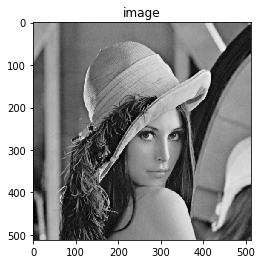

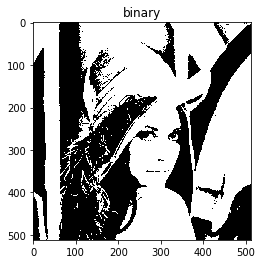

In [4]:
image = cv2.imread('img/Lena.png', 0)  #0 = cv2.IMREAD_GRAYSCALE
thr, mask = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)  #threshold=임계값

print('Threshold used:', thr)

imshow("image", image)
imshow("binary", mask)

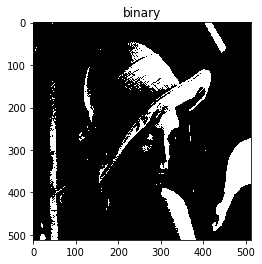

In [5]:
thr, mask = cv2.threshold(image, 180, 255, cv2.THRESH_BINARY)
imshow("binary", mask)

* 가우시안 블러 안 하면

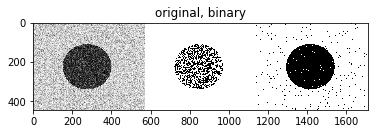

In [34]:
image = cv2.imread('img/circle.png', 0)
#img_blur = cv2.GaussianBlur(image, (5,5), 0)
_,binary50 = cv2.threshold(image, 50,255,cv2.THRESH_BINARY)
_,binary128 = cv2.threshold(image, 128,255,cv2.THRESH_BINARY)
imshow("original, binary", np.hstack([image, binary50,binary128]))

* 가우시안 블러 적용한 뒤

* 쉬운 영상 -> 대비가 높다

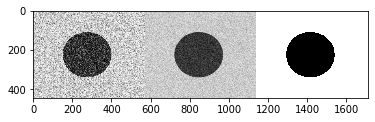

In [30]:
image = cv2.imread('img/circle.png', 0)
img_blur = cv2.GaussianBlur(image, (5,5), 0)  #노이즈 심하면 블러크기 크게 줘
_,binary = cv2.threshold(img_blur, 127,255,cv2.THRESH_BINARY)

imshow("original, blur, binary", np.hstack([image, img_blur, binary]))

* 어려운 영상 -> 대비가 낮다

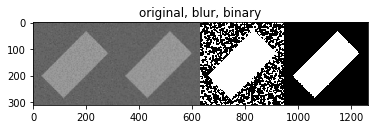

In [33]:
image = cv2.imread('img/boxnoise.png', 0)
img_blur = cv2.GaussianBlur(image, (5,5), 0)
_,binary100 = cv2.threshold(img_blur, 100,255,cv2.THRESH_BINARY)
_,binary127 = cv2.threshold(img_blur, 127,255,cv2.THRESH_BINARY)

imshow("original, blur, binary", np.hstack([image, img_blur, binary100,binary127]))

### 임계값 자동으로 찾기_Global Threshold

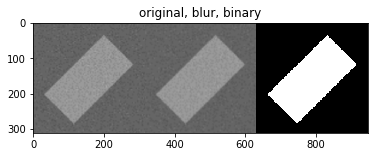

In [42]:
image = cv2.imread('img/boxnoise.png', 0)
img_blur = cv2.GaussianBlur(image, (5,5), 0)
_,binary = cv2.threshold(img_blur, 0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

imshow("original, blur, binary", np.hstack([image, img_blur, binary]))

### 조명이 있는

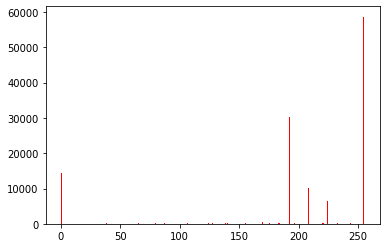

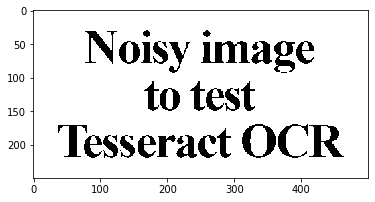

In [59]:
image = cv2.imread('img/example_01.png', 0)
_,binary = cv2.threshold(image, 0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.hist(  image.ravel(), 256, [0,256], color='r'  )
plt.show()
imshow("", np.hstack([binary]))

* OTSU 알고리즘으로 찾을 수 없는 이미지  
-> 지역적으로 적용

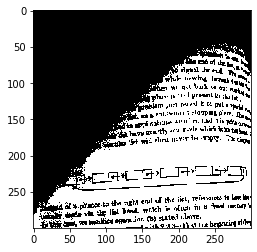

In [69]:
image = cv2.imread('img/text.jpg', 0)
img_blur = cv2.GaussianBlur(image, (3,3), 0)
_,binary = cv2.threshold(image, 120,255,cv2.THRESH_BINARY)

imshow("", binary)

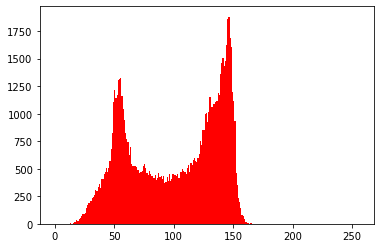

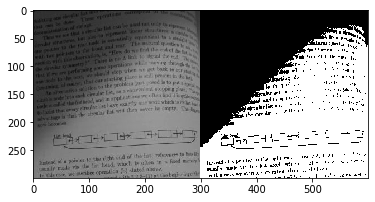

In [62]:
image = cv2.imread('img/text.jpg', 0)
_,binary = cv2.threshold(image, 0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

plt.hist(  image.ravel(), 256, [0,256], color='r'  )
plt.show()
imshow("", np.hstack([image,binary]))

### Adaptive Threshold

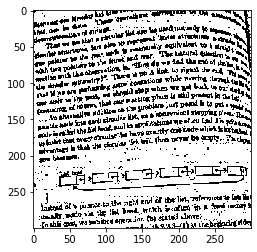

In [74]:
image = cv2.imread('img/text.jpg', 0)
#img_blur = cv2.GaussianBlur(image, (3,3), 0)

binary = cv2.adaptiveThreshold(image, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, 21,2)

imshow("", binary)

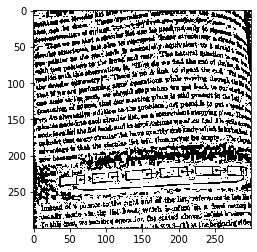

In [76]:
# C=0 했더니
image = cv2.imread('img/text.jpg', 0)
#img_blur = cv2.GaussianBlur(image, (3,3), 0)

binary = cv2.adaptiveThreshold(image, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, 21,0)

imshow("", binary)

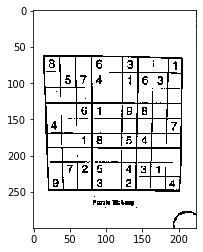

In [78]:
# C=0 했더니
image = cv2.imread('img/grid.jpg', 0)

binary = cv2.adaptiveThreshold(image, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, 21,5)

imshow("", binary)

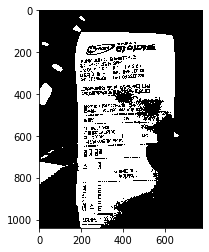

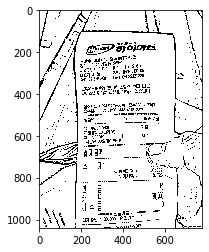

In [96]:
image = cv2.imread('img/receipt.jpg', 0)

_,binary = cv2.threshold(image, 180,255,cv2.THRESH_BINARY)

imshow("", binary)



# C=0 했더니
image = cv2.imread('img/receipt.jpg', 0)

binary = cv2.adaptiveThreshold(image, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, 21,5)

imshow("", binary)

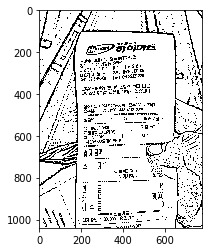

In [2]:
image = cv2.imread('img/receipt.jpg', 0)

_,binary = cv2.threshold(image, 180,255,cv2.THRESH_BINARY)



# C=0 했더니
image = cv2.imread('img/receipt.jpg', 0)

binary = cv2.adaptiveThreshold(image, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY, 21,3)

imshow("", binary)

## 다시 차원을 높여 인식

### 외곽선 찾기 - findContours

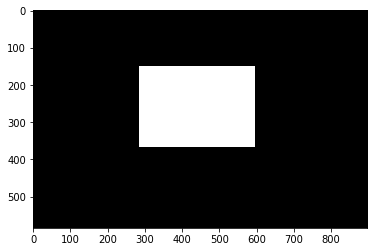

[array([[[285, 149]],
 
        [[285, 367]],
 
        [[593, 367]],
 
        [[593, 149]]], dtype=int32)]

In [7]:
img = cv2.imread('img/shape4.png', 0)

thr, mask = cv2.threshold(img, 0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
imshow("", mask)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
contours

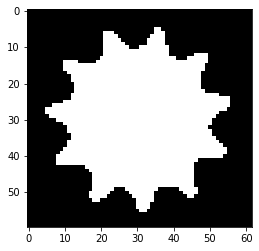

[array([[[35,  5]],

       [[35,  6]],

       [[33,  8]],

       [[33,  9]],

       [[32, 10]],

       [[31, 10]],

       [[30, 11]],

       [[28, 11]],

       [[23,  6]],

       [[21,  6]],

       [[21, 12]],

       [[18, 15]],

       [[14, 15]],

       [[13, 14]],

       [[10, 14]],

       [[10, 16]],

       [[12, 18]],

       [[12, 19]],

       [[13, 20]],

       [[13, 22]],

       [[12, 23]],

       [[12, 24]],

       [[11, 25]],

       [[10, 25]],

       [[ 9, 26]],

       [[ 7, 26]],

       [[ 6, 27]],

       [[ 5, 27]],

       [[ 5, 28]],

       [[ 6, 29]],

       [[ 7, 29]],

       [[ 8, 30]],

       [[ 9, 30]],

       [[11, 32]],

       [[11, 33]],

       [[12, 34]],

       [[12, 35]],

       [[11, 36]],

       [[11, 37]],

       [[ 8, 40]],

       [[ 8, 42]],

       [[15, 42]],

       [[18, 45]],

       [[18, 49]],

       [[17, 50]],

       [[17, 51]],

       [[18, 52]],

       [[19, 52]],

       [[20, 51]],

       [[21, 51]],


In [8]:
img = cv2.imread('img/shape5.png', 0)

thr, mask = cv2.threshold(img, 0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255-mask  #inverse
imshow("", mask)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
print(contours)

### 외곽 성분 그리기 - drawContours

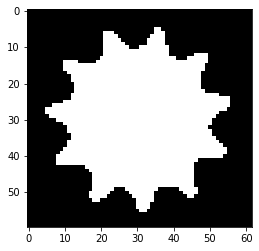

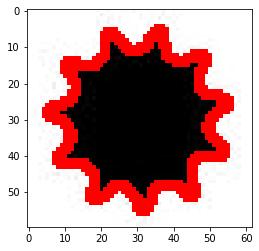

In [14]:
img = cv2.imread('img/shape5.png', 0)  #grayscale

thr, mask = cv2.threshold(img, 0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255-mask  #inverse
imshow("", mask)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


image = cv2.imread('img/shape5.png')  #color
cv2.drawContours(image, contours, -1, (0,0,255),2)

imshow("", image)

### Approximation

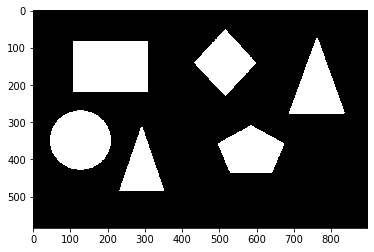

contours 갯수(shape) = 6
점 갯수 = 240


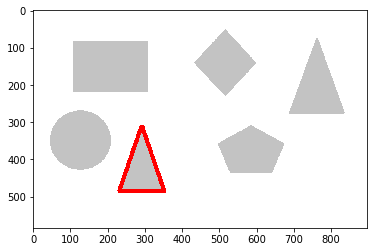

In [33]:
img = cv2.imread('img/shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255 - mask
imshow("", mask)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

print(  f"contours 갯수(shape) = {len(contours)}"  )
print(  f"점 갯수 = {len(con)}"  )
con = contours[0]

cv2.drawContours(img, [con], -1, (0,0,255),10)  #contours 자리에는 list 들어가야
imshow("", img)

shape=240
shape=300
shape=226
shape=4
shape=298
shape=56


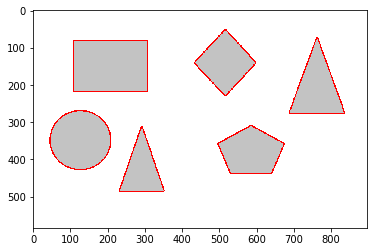

In [50]:
img = cv2.imread('img/shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255 - mask

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for con in contours :
    print(  f"shape={len(con)}"  )
    cv2.drawContours(img, [con], -1, (0,0,255),2)

imshow("",img)

* con이 3차원 행렬임

In [46]:
con.shape

(56, 1, 2)

* 각 도형의 시작점에 파란 점 그리기, 두번째 점에 초록 점 그리기

shape=240
shape=300
shape=226
shape=4
shape=298
shape=56


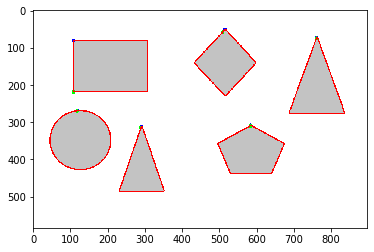

In [73]:
img = cv2.imread('img/shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255 - mask

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for con in contours :
    print(  f"shape={len(con)}"  )
    x = con[0][0][0]
    y = con[0][0][1]
    cv2.circle(img, (x,y), 5, (255,0,0), -1)  # -1 : 채우기, 1 : 테두리만
    cv2.circle(img, (con[1][0][0],con[1][0][1]), 5, (0,255,0), -1)   #두번째 점
    cv2.drawContours(img, [con], -1, (0,0,255),2)

imshow("",img)

위와 똑같은 코드 (tuple화)

shape=240
shape=300
shape=226
shape=4
shape=298
shape=56


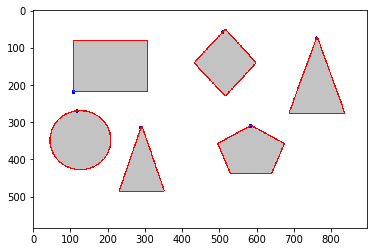

In [70]:
img = cv2.imread('img/shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255 - mask

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

for con in contours :
    print(  f"shape={len(con)}"  )
    p = tuple(con[1][0])
    cv2.circle(img, p,5, (255,0,0), -1)  # -1 : 채우기, 1 : 테두리만
    
    cv2.drawContours(img, [con], -1, (0,0,255),2)

imshow("",img)

## 꼭짓점의 갯수 찾기 - approximation
폐곡선 길이의 2% 로 approximation

shape=240   length=513.7056245803833   approx=3
shape=300   length=515.9310202598572   approx=5
shape=226   length=531.8721435070038   approx=8
shape=4   length=672.0   approx=4
shape=298   length=616.7178171873093   approx=3
shape=56   length=493.0336227416992   approx=4


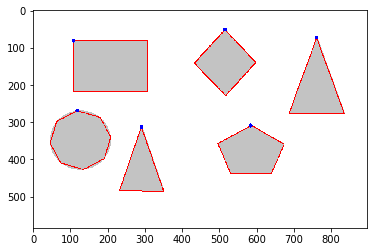

In [93]:
img = cv2.imread('img/shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255 - mask

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)




for con in contours :
    
    peri = cv2.arcLength(con, True)
    approx = cv2.approxPolyDP(con, 0.02 * peri, True)
    # 첫번째 parameter : 점들 (이미지 아님)
    # 두번째 parameter : approximation 할 정도
    
    print(  f"shape={len(con)}   length={peri}   approx={len(approx)}"  )
    p = tuple(con[0][0])
    cv2.drawContours(img, [approx], -1, (0,0,255),2)
    cv2.circle(img, p, 5, (255,0,0), -1)  # -1 : 채우기, 1 : 테두리만
    
#    cv2.putText(img, "test", (p[0]+30,p[1]-10),
#           cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255,255,0), 3)
    

imshow("",img)

shape=240   length=513.7056245803833   approx=3   : 작은 삼각형  
shape=300   length=515.9310202598572   approx=5   : 오각형  
shape=226   length=531.8721435070038   approx=8   : 원  
shape=4   length=672.0   approx=4                 : 사각형  
shape=298   length=616.7178171873093   approx=3   : 큰 삼각형  
shape=56   length=493.0336227416992   approx=4    : 다이아몬드

* 텍스트 추가

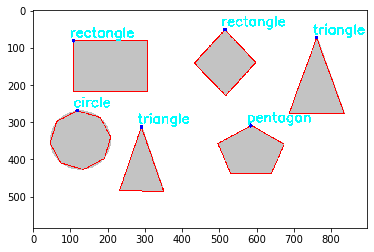

In [123]:
img = cv2.imread('img/shape3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255 - mask

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)




for con in contours :
    
    peri = cv2.arcLength(con, True)
    approx = cv2.approxPolyDP(con, 0.02 * peri, True)
    # 첫번째 parameter : 점들 (이미지 아님)
    # 두번째 parameter : approximation 할 정도
    
    p = tuple(con[0][0])
    cv2.drawContours(img, [approx], -1, (0,0,255),2)
    cv2.circle(img, p, 5, (255,0,0), -1)  # -1 : 채우기, 1 : 테두리만
    
    
    lenapprox = len(approx)
    
    if lenapprox == 3 :
        shapename = "triangle"
    elif lenapprox == 4 :
        shapename = "rectangle"
    elif lenapprox == 5 :
        shapename = "pentagon"
    elif lenapprox >= 8 :
        shapename = "circle"
    
    cv2.putText(img, shapename, (p[0]-10,p[1]-10),
           cv2.FONT_HERSHEY_SIMPLEX, 1.2, (255,255,0), 3)


imshow("",img)

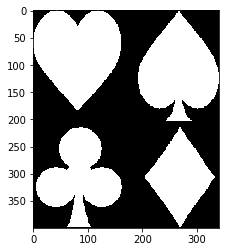

shape=311   length=781.2102373838425   approx=14
shape=222   length=477.452877163887   approx=4
shape=266   length=680.5239473581314   approx=10
shape=211   length=591.5950154066086   approx=8


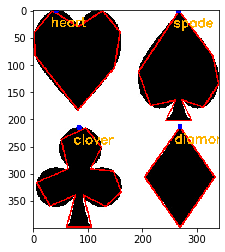

In [151]:
img = cv2.imread('img/cards2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255 - mask
imshow("",mask)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for con in contours :
    
    peri = cv2.arcLength(con, True)
    approx = cv2.approxPolyDP(con, 0.02 * peri, True)
    
    print(  f"shape={len(con)}   length={peri}   approx={len(approx)}"  )
    p = tuple(con[0][0])
    cv2.drawContours(img, [approx], -1, (0,0,255),2)
    cv2.circle(img, p, 5, (255,0,0), -1)
    
    
    
    lenapprox = len(approx)
    
    if lenapprox <= 4 :
        shapename = "diamond"
    elif lenapprox <= 8 :
        shapename = "heart"
    elif lenapprox <= 12 :
        shapename = "spade"
    elif lenapprox >= 13 :
        shapename = "clover"
    
    cv2.putText(img, shapename, (p[0]-10,p[1]+30),
           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,180,255), 2)

imshow("",img)


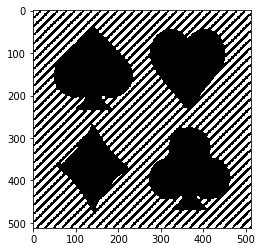

shape=12   length=60.28427076339722   approx=4
shape=20   length=118.02438688278198   approx=4
shape=13   length=135.48023200035095   approx=4
shape=13   length=135.48023200035095   approx=4
shape=13   length=135.48023200035095   approx=4
shape=13   length=135.48023200035095   approx=4
shape=19   length=133.72287106513977   approx=4
shape=16   length=167.66399657726288   approx=4
shape=20   length=174.59292936325073   approx=4
shape=13   length=206.1909101009369   approx=4
shape=9   length=40.284271597862244   approx=7
shape=17   length=204.4335491657257   approx=3
shape=17   length=210.67618989944458   approx=4
shape=17   length=74.56854271888733   approx=5
shape=10   length=21.071067690849304   approx=10
shape=35   length=223.50461781024933   approx=3
shape=17   length=228.4751751422882   approx=4
shape=20   length=231.16147565841675   approx=4
shape=14   length=238.96046113967896   approx=3
shape=15   length=255.3452388048172   approx=3
shape=14   length=271.4873700141907   approx=3

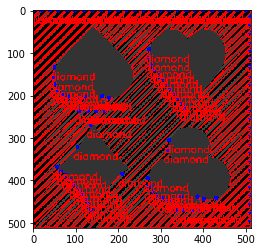

In [147]:
img = cv2.imread('img/cards3.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

thr, mask = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255 - mask
imshow("",mask)

contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


for con in contours :
    
    peri = cv2.arcLength(con, True)
    approx = cv2.approxPolyDP(con, 0.02 * peri, True)
    
    print(  f"shape={len(con)}   length={peri}   approx={len(approx)}"  )
    p = tuple(con[0][0])
    cv2.drawContours(img, [approx], -1, (0,0,255),2)
    cv2.circle(img, p, 5, (255,0,0), -1)
    
    
    
    lenapprox = len(approx)
    
    if lenapprox <= 4 :
        shapename = "diamond"
    elif lenapprox <= 8 :
        shapename = "heart"
    elif lenapprox <= 12 :
        shapename = "spade"
    elif lenapprox >= 13 :
        shapename = "clover"
    
    cv2.putText(img, shapename, (p[0]-10,p[1]+30),
           cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0,0,255), 2)

imshow("",img)


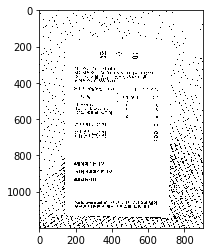

In [158]:
img = cv2.imread('img/receipt2.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
#gray = cv2.GaussianBlur(gray, (21,21), 0)

thr, mask = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
mask = 255 - mask
imshow("",mask)

## Morphology

둘 다 사이즈는 유지  
* opened : 주변 노이즈 제거. 테두리 매끄럽게 하기.  
* closed : 비어있는 hole 매꾸기  
iterations 많으면 많은 구멍이 매꿔져

* 전경 = 흰색, 배경 = 검정색

binary


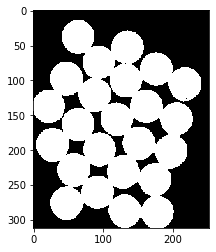

eroded


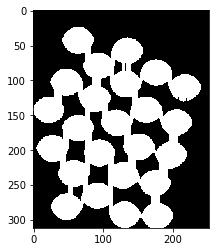

dilated


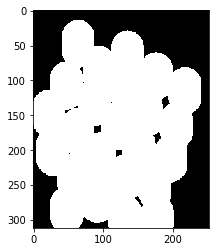

opened


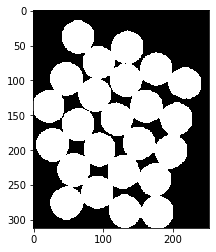

closed


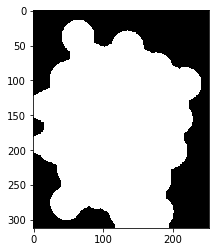

In [174]:
img = cv2.imread('img/water_coins.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
mask = 255 - gray

_, binary = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
print('binary')
imshow("",binary)

# 침식,팽창
eroded = cv2.morphologyEx(binary, cv2.MORPH_ERODE,(3,3),iterations=10)
dilated = cv2.morphologyEx(binary, cv2.MORPH_DILATE,(5,5),iterations=20)

print('eroded')
imshow("",eroded)
print('dilated')
imshow("",dilated)

# 침식 후 팽창
opened = cv2.cv2.morphologyEx(binary, cv2.MORPH_OPEN,
            cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)), iterations=5)

# 팽창 후 침식
closed = cv2.cv2.morphologyEx(binary, cv2.MORPH_CLOSE,
            cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5,5)), iterations=5)

print('opened')
imshow("",opened)
print('closed')
imshow("",closed)

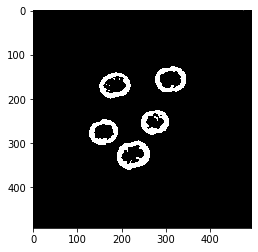

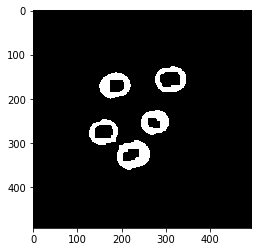

In [187]:
frame = cv2.imread("img/coin.png")
roi = frame.copy()
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
gray_blur = cv2.GaussianBlur(gray, (7,7), 0)
thresh = cv2.adaptiveThreshold(gray_blur, 255,
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
            cv2.THRESH_BINARY_INV, 45, 6)   #inverse를 여기서 _INV 붙여도 됨

imshow("", thresh)

# kernel default값은 십자가1인데,
# 모든 원소가 1인 커널을 만들어 사용. -> 내부를 다 채움
kernel = np.ones((3,3), np.uint8)
closing = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel, iterations=7)
imshow("", closing)

원이 완전히 채워지지는 않는다. 아래에서 타원 외곽선을 찾아보자

### 외곽선 찾기
* findContours 는 원본을 변경시킴(입력뿐만 아니라 출력으로도 같이 쓰는) -> copy 필요

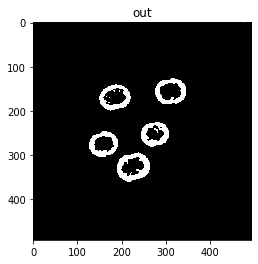

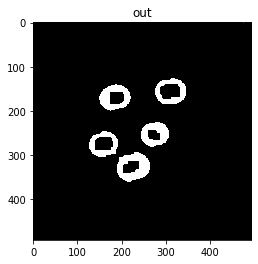

6

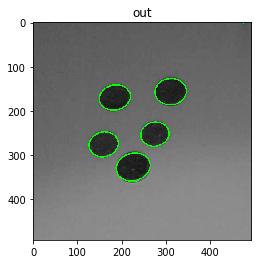

In [200]:
cont_img = closing.copy()
contours, _ = cv2.findContours(cont_img, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    area =cv2.contourArea(cnt)   # 면적 계산. 실수값.
    if area < 2000 or area > 4000 :
        continue
    if len(cnt) < 5:  #포인터 개수가 5미만 = 원이 아닌 경우
        continue
    ellipse = cv2.fitEllipse(cnt)  #주어진 점을 타원으로 맵핑. (장축,단축) 리턴
    cv2.ellipse(roi, ellipse, (0,255,0), 2)  #맨뒤 : 그릴 타원의 굵기

imshow("out", thresh)
imshow("out", cont_img)
imshow("out", roi)
len(contours)

* contour 조건을 없앤다면  
차이점이 뭔지 모르겠다

6

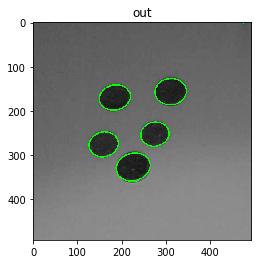

In [219]:
cont_img2 = closing.copy()
contours, _ = cv2.findContours(cont_img2, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)

for cnt in contours:
    
    ellipse = cv2.fitEllipse(cnt)  #주어진 점을 타원으로 맵핑. (장축,단축) 리턴
    cv2.ellipse(roi, ellipse, (0,255,0), 2)  #맨뒤 : 그릴 타원의 굵기

imshow("out", roi)
len(contours)

#### 영수증에서

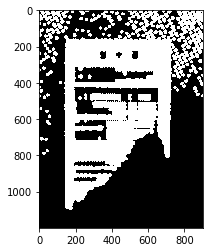

143

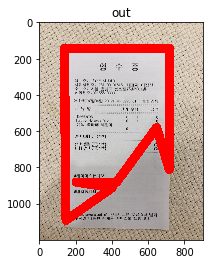

In [341]:
receipt = cv2.imread('img/receipt2.jpg')
receipt_gray = cv2.cvtColor(receipt, cv2.COLOR_BGR2GRAY)
#_, mask = cv2.threshold(receipt_gray, 120, 205, cv2.THRESH_BINARY)
_, mask = cv2.threshold(receipt_gray, 0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

opened = cv2.cv2.morphologyEx(mask, cv2.MORPH_OPEN,
            cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7)), iterations=3)

rimg = receipt.copy()
imshow("", opened)

contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)


mx = 0
for cnt in contours:
    area =cv2.contourArea(cnt)   # 면적 계산. 실수값.
    if area > mx :
        mx = area
        maxcnt = cnt
    
    if area < 2000 :
        continue
        
    if len(cnt) < 3 :
        continue
    
    '''
    #rectangle
    x, y, w, h = cv2.boundingRect(cnt)
    rimg = cv2.rectangle(rimg,(x,y),(x+w, y+h),(0,255,0), 50) # green
    
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    rimg = cv2.drawContours(rimg,[box],0,(0,0,255),50)
    '''


peri = cv2.arcLength(maxcnt, True)
approx = cv2.approxPolyDP(maxcnt, 0.02 * peri, True)
cv2.drawContours(rimg, [approx], -1, (0,0,255),50)

imshow("out", rimg)
len(contours)

#cv2.imwrite("output_receipt.png", rimg)

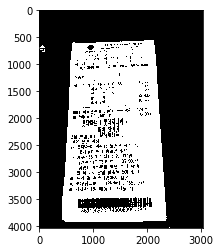

True

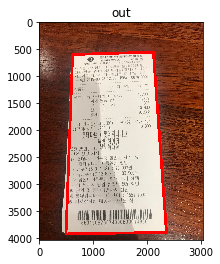

In [344]:
receipt = cv2.imread('img/mart2.jpg')
receipt_gray = cv2.cvtColor(receipt, cv2.COLOR_BGR2GRAY)
#_, mask = cv2.threshold(receipt_gray, 120, 205, cv2.THRESH_BINARY)
_, mask = cv2.threshold(receipt_gray, 0,255,cv2.THRESH_BINARY + cv2.THRESH_OTSU)

opened = cv2.cv2.morphologyEx(mask, cv2.MORPH_OPEN,
            cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (7,7)), iterations=3)

rimg = receipt.copy()

contours, _ = cv2.findContours(opened, cv2.RETR_EXTERNAL,
                              cv2.CHAIN_APPROX_SIMPLE)


mx = 0
for cnt in contours:
    area =cv2.contourArea(cnt)   # 면적 계산. 실수값.
    peri = cv2.arcLength(maxcnt, True)
    approx = cv2.approxPolyDP(maxcnt, 0.02 * peri, True)
    if area > mx :
        mx = area
        maxcnt = approx
    
    if area < 2000 :
        continue
        
    if len(cnt) < 3 :
        continue
    
    '''
    #rectangle
    x, y, w, h = cv2.boundingRect(cnt)
    rimg = cv2.rectangle(rimg,(x,y),(x+w, y+h),(0,255,0), 50) # green
    
    rect = cv2.minAreaRect(cnt)
    box = cv2.boxPoints(rect)
    box = np.int0(box)
    rimg = cv2.drawContours(rimg,[box],0,(0,0,255),50)
    '''

cv2.drawContours(rimg, [approx], -1, (0,0,255),50)


imshow("", opened)
imshow("out", rimg)
len(contours)

cv2.imwrite("output_receipt.png", rimg)

pf) 영수증 찾기

In [ ]:


for i in range(len(contours)) : 
    